In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [91]:
lock_meas = '..\\..\\DATA\\RAW\\Measure_03\Complex' # Location folder of the measurement files
file_list = os.listdir(lock_meas)
meas_date = '2018_ 11_ 26_12_40_05_'

imu_data = pd.read_csv(lock_meas + '\\' + meas_date + 'IMU.txt',
                               sep='\t',
                               decimal=',',
                               names=['time', 'acc0', 'acc1', 'acc2', 'gyro0', 'gyro1', 'gyro2', 'mag0', 'mag1', 'mag2'])

mocap_data = pd.read_csv(lock_meas + '\\' + meas_date + 'MoCap.txt',
                                 sep='\t',
                                 decimal=',',
                                 names=['time', 'x', 'y', 'z', 'tracked', 'beta', 'Qx', 'Qy', 'Qz', 'Qw'])

# Merge the two data file to synronise them. In both dataset there are some data row that can't be matched, this data will
# be trown away
df = pd.merge(imu_data, mocap_data, on=['time'], how='inner')

In [92]:
df.size

152209

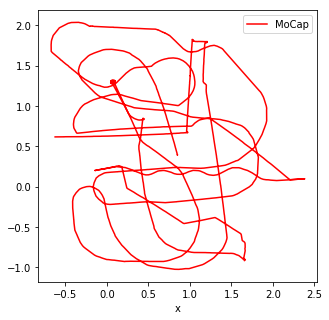

In [93]:
df.plot(x='x', y='z', color='red', figsize=(5,5), label='MoCap')

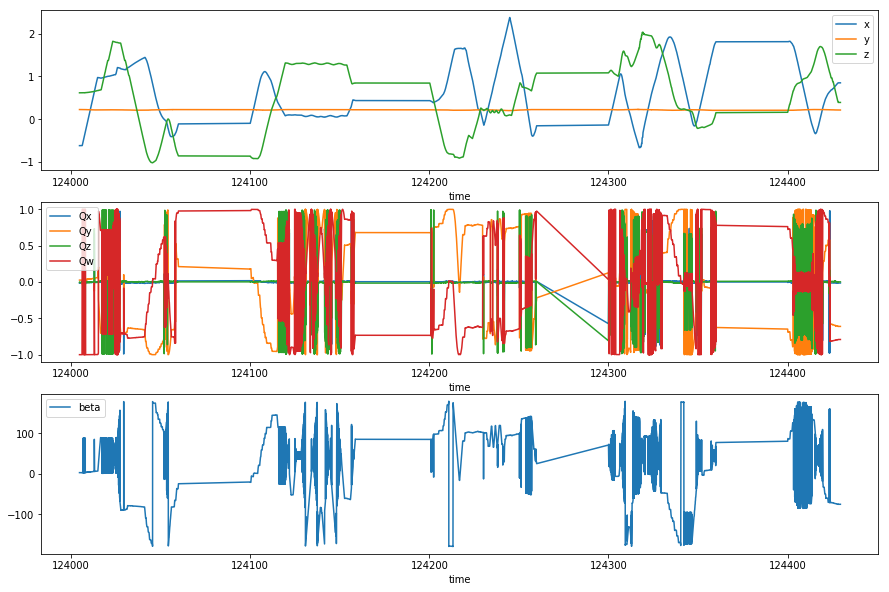

In [94]:
f2, (ax4, ax5, ax6) = plt.subplots(3, 1)
df.plot(x='time', y='x', figsize=(15,10), ax=ax4)
df.plot(x='time', y='y', ax=ax4)
df.plot(x='time', y='z', ax=ax4)
df.plot(x='time', y='Qx', ax=ax5)
df.plot(x='time', y='Qy', ax=ax5)
df.plot(x='time', y='Qz', ax=ax5)
df.plot(x='time', y='Qw', ax=ax5)
df.plot(x='time', y='beta', ax=ax6)

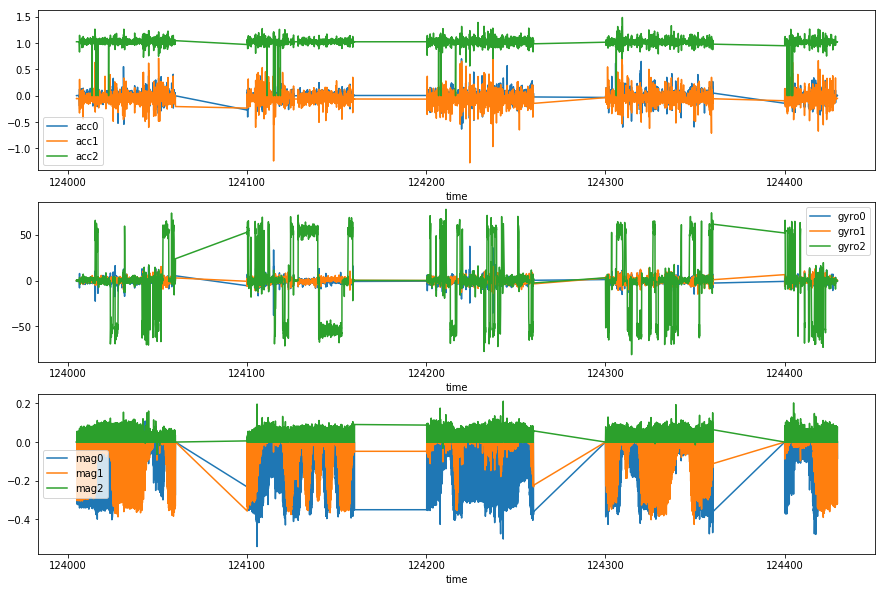

In [95]:
f1, (ax1, ax2, ax3) = plt.subplots(3, 1)
df.plot(x='time', y='acc0', figsize=(15,10), ax=ax1)
df.plot(x='time', y='acc1', ax=ax1)
df.plot(x='time', y='acc2', ax=ax1)
df.plot(x='time', y='gyro0', ax=ax2)
df.plot(x='time', y='gyro1', ax=ax2)
df.plot(x='time', y='gyro2', ax=ax2)
df.plot(x='time', y='mag0', ax=ax3)
df.plot(x='time', y='mag1', ax=ax3)
df.plot(x='time', y='mag2', ax=ax3)